In [16]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
clf = LogisticRegression(multi_class='multinomial')

In [9]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [10]:
y_pred = clf.predict(X_test)

In [11]:
print(accuracy_score(y_test,y_pred))

0.7666666666666667


In [12]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,13,1,0
1,0,4,4
2,0,2,6


In [13]:
#Predications
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

array([[9.80994083e-01, 1.87535896e-02, 2.52327111e-04]])

In [14]:
clf.predict(query)

array([0])

In [23]:
!pip3 install mlxtend 

  Using cached mlxtend-0.21.0-py2.py3-none-any.whl (1.3 MB)


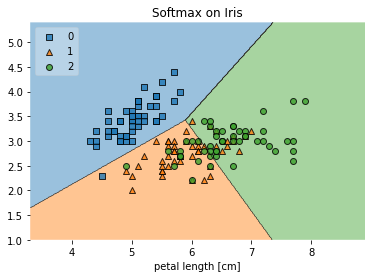

In [24]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()